In [2]:
import pandas as pd
import numpy as np

from pandas import DataFrame,Series

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


In [3]:
####Read xlx.s file

###Reading the excel file by sheets


df_bolt_Searches_raw=pd.read_excel(io='C:\\Users\\287910031\\Data Analysis Task II.xlsx',sheet_name='Searches_raw')

df_bolt_Searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-11-13 23,2,34,94
1,2016-11-13 22,7,47,87
2,2016-11-13 21,14,44,76
3,2016-11-13 20,5,40,89
4,2016-11-13 19,7,37,84


In [4]:
df_bolt_Activity_raw=pd.read_excel(io='C:\\Users\\287910031\\Data Analysis Task II.xlsx',sheet_name='Activity_raw')

In [38]:
##Q1 1a) For each hour of the week, calculate the total number of unique searches with 100% coverage.



In [85]:
#ANS:

df_bolt_Searches_raw[df_bolt_Searches_raw['Coverage Ratio (unique)']==100]

Total_unique_searches=df_bolt_Searches_raw[df_bolt_Searches_raw['Coverage Ratio (unique)']==100]['People saw +1 cars (unique)'].sum()

print('total number of unique searches with 100% coverage  is',Total_unique_searches)


total number of unique searches with 100% coverage  is 38


In [6]:
##1b) Create a pivot table to illustrate the distribution of total number of unique searches against Hours and Weekdays (24x7 grid).														

Total_unique=df_bolt_Searches_raw['People saw 0 cars (unique)'] + df_bolt_Searches_raw['People saw +1 cars (unique)']

df_bolt_Searches_raw['Total_unique']=Total_unique

df_bolt_Searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique
0,2016-11-13 23,2,34,94,36
1,2016-11-13 22,7,47,87,54
2,2016-11-13 21,14,44,76,58
3,2016-11-13 20,5,40,89,45
4,2016-11-13 19,7,37,84,44


In [7]:
df_bolt_Searches_raw['Date_datetime']=pd.to_datetime(df_bolt_Searches_raw['Date'])
df_bolt_Searches_raw['Time']=df_bolt_Searches_raw['Date_datetime'].dt.time
df_bolt_Searches_raw['Weekdays']=df_bolt_Searches_raw['Date_datetime'].dt.weekday_name
df_bolt_Searches_raw.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique,Date_datetime,Time,Weekdays
0,2016-11-13 23,2,34,94,36,2016-11-13 23:00:00,23:00:00,Sunday
1,2016-11-13 22,7,47,87,54,2016-11-13 22:00:00,22:00:00,Sunday
2,2016-11-13 21,14,44,76,58,2016-11-13 21:00:00,21:00:00,Sunday
3,2016-11-13 20,5,40,89,45,2016-11-13 20:00:00,20:00:00,Sunday
4,2016-11-13 19,7,37,84,44,2016-11-13 19:00:00,19:00:00,Sunday


In [87]:
#ANS

print ('pivot table to illustrate the distribution of total number of unique searches against Hours and Weekdays')

pvt=pd.pivot_table(df_bolt_Searches_raw[['Weekdays','Time','Total_unique']],index='Time',columns='Weekdays',values='Total_unique')

column_names = ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"]

pvt= pvt.reindex(columns=column_names)
pvt.head()

pivot table to illustrate the distribution of total number of unique searches against Hours and Weekdays


Weekdays,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Time,,,,,,,
00:00:00,84,26,16,32,31,34,164
01:00:00,44,17,6,23,22,20,61
02:00:00,61,4,9,5,5,12,33
03:00:00,57,2,9,9,1,6,40
04:00:00,51,4,7,7,4,5,31


In [34]:
#Q2) Illustate in a chart the demand and supply throughout the week.





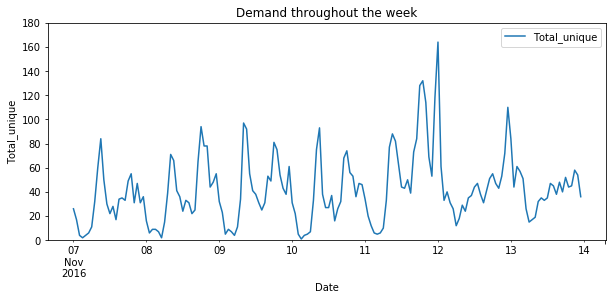

In [81]:
##ANSWERS BELOW

###OPTION 1
ax1=df_bolt_Searches_raw.plot.line(x='Date',y='Total_unique',legend='True',figsize=(10,4),ylim=(0,180))
##sns.regplot(x='Date',y='Total_unique',data=df_bolt_Searches_raw)
plt.xlabel('Date')
plt.ylabel('Total_unique')
plt.title('Demand throughout the week')

df_bolt_Searches_raw['Date']= pd.to_datetime(df_bolt_Searches_raw['Date'])

In [10]:
df_bolt_Activity_raw.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19,58,26,4,22,17,0.4,0.46,12


Text(0.5,1,'Supply throughout the week')

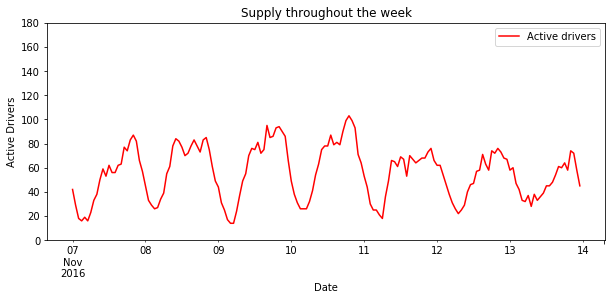

In [82]:
##OPTION1 B
df_bolt_Activity_raw['Date']= pd.to_datetime(df_bolt_Activity_raw['Date'])
df_bolt_Activity_raw.plot.line(x='Date',y='Active drivers',legend='True',figsize=(10,4),ylim=(0,180),color='r')
plt.xlabel('Date')
plt.ylabel('Active Drivers')
plt.title('Supply throughout the week')

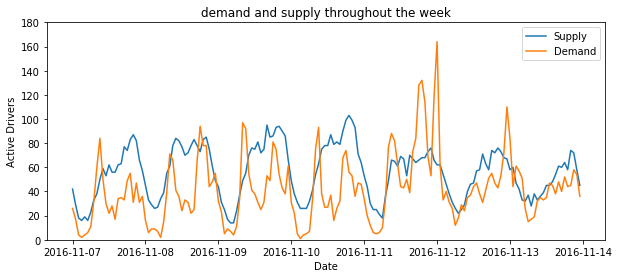

In [84]:
#OPTION2


fig, ax = plt.subplots(figsize=(10,4))


ax.plot(df_bolt_Activity_raw['Date'], df_bolt_Activity_raw['Active drivers'], label='Supply')
ax.plot(df_bolt_Searches_raw['Date'],df_bolt_Searches_raw['Total_unique'] , label='Demand')
##ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper right')
plt.ylim(0,180)

plt.xlabel('Date')
plt.ylabel('Active Drivers')

plt.title('demand and supply throughout the week')
# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')


plt.show()

In [35]:
#Q3) In a form of a 24x7 grid (hour-weekday grid), visualize a coverage heatmap. 
#This one will be sent to drivers to show when is the best time to go online (low coverage usually suggests higher demand), 
##make sure the format is appropiate for them!





Text(0.5,1,'24x7 grid (hour-weekday grid) coverage heatmap')

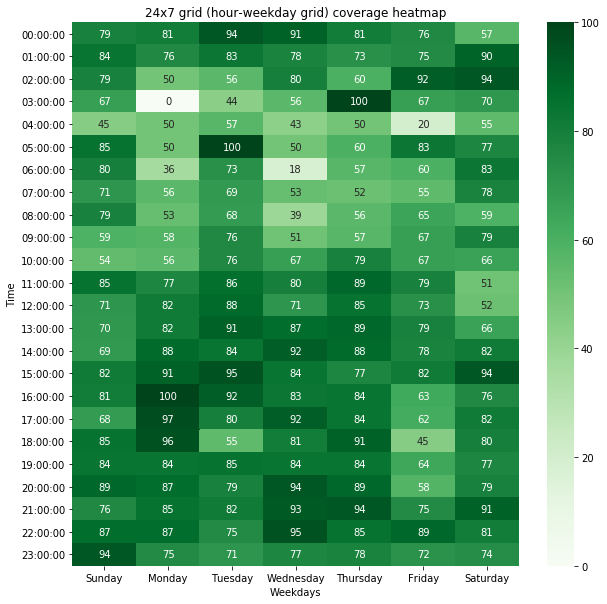

In [79]:
###ANSQ3

cov_pvt=pd.pivot_table(df_bolt_Searches_raw[['Weekdays','Time','Coverage Ratio (unique)']],index='Time',columns='Weekdays',values='Coverage Ratio (unique)')

column_names = ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"]

cov_pvt= cov_pvt.reindex(columns=column_names)
cov_pvt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cov_pvt,annot=True,fmt='d',cmap='Greens')

plt.title('24x7 grid (hour-weekday grid) coverage heatmap')

In [ ]:
#4) If it was possible to introduce higher pricing during specific hours to increase supply and decrease demand, what weekly schedule of price multipliers would you choose? Visualise in a heatmap and provide specific multipliers.														


In [16]:
sol=pd.merge(df_bolt_Searches_raw,df_bolt_Activity_raw,on='Date')


In [17]:
assum=sol.copy()

assum.loc[164]

Date                           2016-11-07 03:00:00
People saw 0 cars (unique)                       2
People saw +1 cars (unique)                      0
Coverage Ratio (unique)                          0
Total_unique                                     2
Date_datetime                  2016-11-07 03:00:00
Time                                      03:00:00
Weekdays                                    Monday
Active drivers                                  16
Online (h)                                       5
Has booking (h)                                  0
Waiting for booking (h)                          5
Busy (h)                                         3
Hours per active driver                        0.3
Rides per online hour                            0
Finished Rides                                   0
Name: 164, dtype: object

In [18]:
sol.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique,Date_datetime,Time,Weekdays,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-11-13 23:00:00,2,34,94,36,2016-11-13 23:00:00,23:00:00,Sunday,45,22,3,19,13,0.5,0.45,10
1,2016-11-13 22:00:00,7,47,87,54,2016-11-13 22:00:00,22:00:00,Sunday,58,23,5,18,18,0.4,0.52,12
2,2016-11-13 21:00:00,14,44,76,58,2016-11-13 21:00:00,21:00:00,Sunday,72,24,6,19,20,0.3,0.71,17
3,2016-11-13 20:00:00,5,40,89,45,2016-11-13 20:00:00,20:00:00,Sunday,74,30,5,25,17,0.4,0.47,14
4,2016-11-13 19:00:00,7,37,84,44,2016-11-13 19:00:00,19:00:00,Sunday,58,26,4,22,17,0.4,0.46,12


In [19]:
sol[sol['Coverage Ratio (unique)']==0]

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique,Date_datetime,Time,Weekdays,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
164,2016-11-07 03:00:00,2,0,0,2,2016-11-07 03:00:00,03:00:00,Monday,16,5,0,5,3,0.3,0.0,0


In [20]:
sol.sort_values(by=['Coverage Ratio (unique)'],ascending=True)

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique,Date_datetime,Time,Weekdays,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
164,2016-11-07 03:00:00,2,0,0,2,2016-11-07 03:00:00,03:00:00,Monday,16,5,0,5,3,0.3,0.00,0
113,2016-11-09 06:00:00,9,2,18,11,2016-11-09 06:00:00,06:00:00,Wednesday,24,6,0,6,7,0.3,0.00,0
67,2016-11-11 04:00:00,4,1,20,5,2016-11-11 04:00:00,04:00:00,Friday,25,10,1,9,7,0.4,0.20,2
161,2016-11-07 06:00:00,7,4,36,11,2016-11-07 06:00:00,06:00:00,Monday,23,9,1,8,4,0.4,0.22,2
111,2016-11-09 08:00:00,59,38,39,97,2016-11-09 08:00:00,08:00:00,Wednesday,49,18,10,8,10,0.4,1.06,19
115,2016-11-09 04:00:00,4,3,43,7,2016-11-09 04:00:00,04:00:00,Wednesday,14,5,0,5,6,0.4,0.00,0
140,2016-11-08 03:00:00,5,4,44,9,2016-11-08 03:00:00,03:00:00,Tuesday,26,14,0,14,8,0.5,0.07,1
19,2016-11-13 04:00:00,28,23,45,51,2016-11-13 04:00:00,04:00:00,Sunday,33,10,4,6,11,0.3,1.00,10
53,2016-11-11 18:00:00,71,57,45,128,2016-11-11 18:00:00,18:00:00,Friday,66,27,19,9,17,0.4,1.07,29
165,2016-11-07 02:00:00,2,2,50,4,2016-11-07 02:00:00,02:00:00,Monday,18,7,0,7,4,0.4,0.14,1


In [21]:


demandincs_pvt=pd.pivot_table(sol[['Weekdays','Time','Coverage Ratio (unique)']],index='Time',columns='Weekdays',values='Coverage Ratio (unique)')
demandincs_pvt.head()

column_names = ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"]

demandincs_pvt= demandincs_pvt.reindex(columns=column_names)
cov_pvt.head()

Weekdays,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Time,,,,,,,
00:00:00,79,81,94,91,81,76,57
01:00:00,84,76,83,78,73,75,90
02:00:00,79,50,56,80,60,92,94
03:00:00,67,0,44,56,100,67,70
04:00:00,45,50,57,43,50,20,55


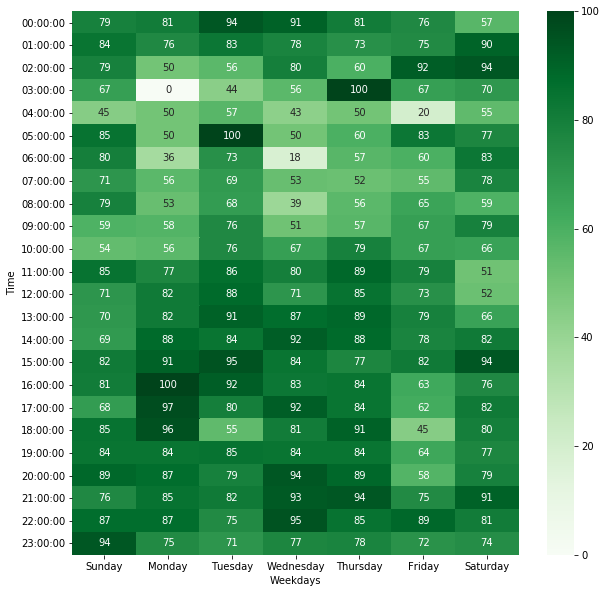

In [22]:
##demandincs_pvt=sol.pivot_table(index='Date',values='Coverage Ratio (unique)')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(demandincs_pvt,annot=True,fmt='d',cmap='Greens')

In [23]:
##ANS Q4:

#1.Beacause highg  demand means low coverage ratio,we have to look fo the day with low coverage ratio.
#2. look at it in relation to number of cars supplied or available
###3.increase the number of cars available hence making sure all customers who viewed and did not see any car now can see
##HENCE THE SOLUTION BELOW
sol[sol['Date']=='2016-11-07 03:00:00']


,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Total_unique,Date_datetime,Time,Weekdays,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
164,2016-11-07 03:00:00,2,0,0,2,2016-11-07 03:00:00,03:00:00,Monday,16,5,0,5,3,0.3,0.0,0


Ans4:

I WILL CHOOSE sol[sol['Date']=='2016-11-07 03:00:00'] WEEKLY SCHEDULE this is because it has a coverage ratio of 0 which means high demand for that period hence will multply active drivers by 2 making active drivers 32.Due to this there will be 21 drivers ONLINE AND 5 waiting for booking hence 100% coverage as 2 people who did not see any car will see 16 more cars available


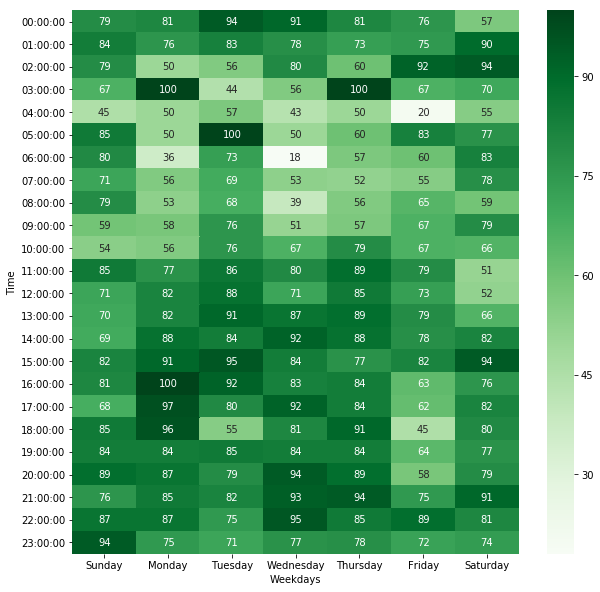

In [90]:
print('Ans4:''\n')
print("I WILL CHOOSE sol[sol['Date']=='2016-11-07 03:00:00'] WEEKLY SCHEDULE this is because it has a coverage ratio of 0 which means high demand for that period hence will multply active drivers by 2 making active drivers 32.Due to this there will be 21 drivers ONLINE AND 5 waiting for booking hence 100% coverage as 2 people who did not see any car will see 16 more cars available")


##low=sol[sol['Date']=='2016-11-07 03:00:00']

##data.loc[0,['Num','NAME']]=[101,'Python']



assum.loc[164,['People saw +1 cars (unique)','Coverage Ratio (unique)','Total_unique',
            'Active drivers','Online (h)','Has booking (h)','Waiting for booking (h)',
            'Finished Rides']]=[2,100,4,32,21,2,21,2]

assum.loc[164]

assum_pvt=pd.pivot_table(assum[['Weekdays','Time','Coverage Ratio (unique)']],index='Time',columns='Weekdays',values='Coverage Ratio (unique)')
column_names = ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"]

assum_pvt= assum_pvt.reindex(columns=column_names)


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(assum_pvt,annot=True,fmt='d',cmap='Greens')
#sol_pvt

In [25]:
#5) Find the 5-hour period (consecutive hours) with highest demand and calculate how much we can spend on driver incentives, given that we want to re-invest all the revenue received in this timeframe. Assume that Finished Rides have the average value of €10 and our commission is 20%.														
pd.set_option('display.max_rows', 500)

sol[['Date','Coverage Ratio (unique)']].sort_values(by=['Date','Coverage Ratio (unique)'],ascending=[True,True])

,Date,Coverage Ratio (unique)
167,2016-11-07 00:00:00,81
166,2016-11-07 01:00:00,76
165,2016-11-07 02:00:00,50
164,2016-11-07 03:00:00,0
163,2016-11-07 04:00:00,50
162,2016-11-07 05:00:00,50
161,2016-11-07 06:00:00,36
160,2016-11-07 07:00:00,56
159,2016-11-07 08:00:00,53
158,2016-11-07 09:00:00,58


In [78]:
##ANSQ5
f_hours=sol.iloc[160:165][['Time','Coverage Ratio (unique)','Finished Rides']].sort_values(by='Time',ascending=True)

#f_hours
sum_fin=f_hours['Finished Rides'].sum()

sum_fin_mul=sum_fin*10

sum_fin_mul

reinvest=sum_fin_mul*0.2

reinvest

print('5-hour period (consecutive hours) with highest demand are:',f_hours['Time'])

print('\n''Sum of Finished Rides are:',sum_fin)

print ('\n''Total sum of finished rides with average €10 is:',sum_fin_mul)

print('\n''We will have to reinvest',reinvest,'€ on drivers incentives')


5-hour period (consecutive hours) with highest demand are: 164    03:00:00
163    04:00:00
162    05:00:00
161    06:00:00
160    07:00:00
Name: Time, dtype: object

Sum of Finished Rides are: 12

Total sum of finished rides with average €10 is: 120

We will have to reinvest 24.0 € on drivers incentives


In [27]:
#6) Estimate the number of weekly trips we could have done (finished) with maximum Coverage Ratio.




In [ ]:
##ANS
sum_of_coverage_ratio=sol['Coverage Ratio (unique)'].sum()

sum_of_finished_trip=sol['Finished Rides'].sum()

In [29]:
####for 100%coverage trip through the week means every day we have a coverage of 100%
sol['Coverage Ratio_Assume (unique)']=100

Coverage_Ratio_Assume=sol['Coverage Ratio_Assume (unique)'].sum()

Coverage_Ratio_Assume

16800

In [40]:
new_weekly_finished=(sum_of_finished_trip * Coverage_Ratio_Assume)/sum_of_coverage_ratio

new_weekly_finished

print('Estimately',round(new_weekly_finished),'trips will be done for the week if coverage ratio is 100% everyday')

###Estimately 2,608 trips will be done for the week if coverage ratio is 100% everyday

Estimately 2608.0 trips will be done for the week if coverage ratio is 100% everyday


In [41]:
##7a) Explain how you understand the concept of driver utilization rate.




In [ ]:
#ans 7a
Utilization is measured by the time spent with passengers in your car compared to time spent online without a passenger.
Driver utilization rate is number of hours spent giving rides divide by the number of hours online,multiplied by 100

In [91]:
#7b) Find the 5 most utilized hours of the week (not necessarily consecutive), and calculate the sum of trips finished in these 5 hours.


ut_rt=sol[['Time','Has booking (h)','Finished Rides']].sort_values(by='Has booking (h)',ascending=False).head()


finr=ut_rt['Finished Rides'].sum()

finr

print('5 most utilized hours are: ''\n', ut_rt['Time'])



5 most utilized hours are: 
 47    00:00:00
53    18:00:00
52    19:00:00
77    18:00:00
54    17:00:00
Name: Time, dtype: object


In [92]:
print ('sum of trips finished in these 5 hours are:',finr)

sum of trips finished in these 5 hours are: 166
